In [4]:
import matplotlib.pyplot as plt
import pandas as pd

# statsmodels
import statsmodels
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

import warnings
warnings.filterwarnings('once')

In [5]:
data = pd.read_csv('electricity_demand_1979_2024_daily.csv')
data.head()

,Date,AT,BA,BE,BG,CH,CY,CZ,DE,DK,...,NL,NO,PL,PT,RO,RS,SE,SI,SK,UK
0,1979/01/01,176514.3,35070.8,258054.1,83038.0,220060.1,9874.4,207395.8,1324992.0,98759.0,...,302990.0,532011.2,391863.9,112389.4,120737.2,111253.5,514562.1,28506.9,71678.1,1025431.6
1,1979/01/02,213039.2,37647.9,292989.9,113936.0,235095.5,11464.5,237659.6,1489543.3,111813.5,...,356807.5,541881.4,464883.0,139130.9,136385.8,135763.3,541929.8,37221.8,82225.5,1200475.0
2,1979/01/03,219072.9,40690.1,295576.4,128486.0,234080.7,11874.1,239119.1,1530437.2,114053.7,...,353591.4,547741.5,483663.1,144728.5,149629.3,146791.9,555309.2,40424.2,84073.7,1208249.5
3,1979/01/04,222644.7,41239.8,291382.5,131505.3,235966.4,13985.3,238099.9,1540992.9,115368.3,...,355602.8,548473.8,486924.3,145464.3,150629.7,142934.2,565994.3,41352.4,84539.7,1207895.9
4,1979/01/05,223514.0,40801.6,295255.1,132363.3,230683.6,14689.1,235368.1,1489922.4,113062.2,...,354296.1,547225.9,452547.5,149202.7,150831.8,143580.9,544307.4,41228.4,85215.2,1227966.3


## Obtención serie temporal

In [6]:
# indexar por fecha
data.index = pd.to_datetime(data['Date'])
data.head()

,Date,AT,BA,BE,BG,CH,CY,CZ,DE,DK,...,NL,NO,PL,PT,RO,RS,SE,SI,SK,UK
Date,,,,,,,,,,,,,,,,,,,,,
1979-01-01,1979/01/01,176514.3,35070.8,258054.1,83038.0,220060.1,9874.4,207395.8,1324992.0,98759.0,...,302990.0,532011.2,391863.9,112389.4,120737.2,111253.5,514562.1,28506.9,71678.1,1025431.6
1979-01-02,1979/01/02,213039.2,37647.9,292989.9,113936.0,235095.5,11464.5,237659.6,1489543.3,111813.5,...,356807.5,541881.4,464883.0,139130.9,136385.8,135763.3,541929.8,37221.8,82225.5,1200475.0
1979-01-03,1979/01/03,219072.9,40690.1,295576.4,128486.0,234080.7,11874.1,239119.1,1530437.2,114053.7,...,353591.4,547741.5,483663.1,144728.5,149629.3,146791.9,555309.2,40424.2,84073.7,1208249.5
1979-01-04,1979/01/04,222644.7,41239.8,291382.5,131505.3,235966.4,13985.3,238099.9,1540992.9,115368.3,...,355602.8,548473.8,486924.3,145464.3,150629.7,142934.2,565994.3,41352.4,84539.7,1207895.9
1979-01-05,1979/01/05,223514.0,40801.6,295255.1,132363.3,230683.6,14689.1,235368.1,1489922.4,113062.2,...,354296.1,547225.9,452547.5,149202.7,150831.8,143580.9,544307.4,41228.4,85215.2,1227966.3


In [7]:
data.columns

Index(['Date', 'AT', 'BA', 'BE', 'BG', 'CH', 'CY', 'CZ', 'DE', 'DK', 'EE',
       'EL', 'ES', 'FI', 'FR', 'HR', 'HU', 'IE', 'IT', 'LT', 'LU', 'LV', 'ME',
       'MK', 'NL', 'NO', 'PL', 'PT', 'RO', 'RS', 'SE', 'SI', 'SK', 'UK'],
      dtype='object')

In [10]:
# quitar columna Date
data_1 = data.drop(columns=['Date'])
data_1.head()

,AT,BA,BE,BG,CH,CY,CZ,DE,DK,EE,...,NL,NO,PL,PT,RO,RS,SE,SI,SK,UK
Date,,,,,,,,,,,,,,,,,,,,,
1979-01-01,176514.3,35070.8,258054.1,83038.0,220060.1,9874.4,207395.8,1324992.0,98759.0,33610.1,...,302990.0,532011.2,391863.9,112389.4,120737.2,111253.5,514562.1,28506.9,71678.1,1025431.6
1979-01-02,213039.2,37647.9,292989.9,113936.0,235095.5,11464.5,237659.6,1489543.3,111813.5,34723.4,...,356807.5,541881.4,464883.0,139130.9,136385.8,135763.3,541929.8,37221.8,82225.5,1200475.0
1979-01-03,219072.9,40690.1,295576.4,128486.0,234080.7,11874.1,239119.1,1530437.2,114053.7,34764.7,...,353591.4,547741.5,483663.1,144728.5,149629.3,146791.9,555309.2,40424.2,84073.7,1208249.5
1979-01-04,222644.7,41239.8,291382.5,131505.3,235966.4,13985.3,238099.9,1540992.9,115368.3,34274.2,...,355602.8,548473.8,486924.3,145464.3,150629.7,142934.2,565994.3,41352.4,84539.7,1207895.9
1979-01-05,223514.0,40801.6,295255.1,132363.3,230683.6,14689.1,235368.1,1489922.4,113062.2,33083.0,...,354296.1,547225.9,452547.5,149202.7,150831.8,143580.9,544307.4,41228.4,85215.2,1227966.3


In [11]:
data_1['demand_EU'] = data_1.iloc[:,:].sum(axis=1)
data_1.head()

,AT,BA,BE,BG,CH,CY,CZ,DE,DK,EE,...,NO,PL,PT,RO,RS,SE,SI,SK,UK,demand_EU
Date,,,,,,,,,,,,,,,,,,,,,
1979-01-01,176514.3,35070.8,258054.1,83038.0,220060.1,9874.4,207395.8,1324992.0,98759.0,33610.1,...,532011.2,391863.9,112389.4,120737.2,111253.5,514562.1,28506.9,71678.1,1025431.6,9355907.3
1979-01-02,213039.2,37647.9,292989.9,113936.0,235095.5,11464.5,237659.6,1489543.3,111813.5,34723.4,...,541881.4,464883.0,139130.9,136385.8,135763.3,541929.8,37221.8,82225.5,1200475.0,10725478.9
1979-01-03,219072.9,40690.1,295576.4,128486.0,234080.7,11874.1,239119.1,1530437.2,114053.7,34764.7,...,547741.5,483663.1,144728.5,149629.3,146791.9,555309.2,40424.2,84073.7,1208249.5,11054636.7
1979-01-04,222644.7,41239.8,291382.5,131505.3,235966.4,13985.3,238099.9,1540992.9,115368.3,34274.2,...,548473.8,486924.3,145464.3,150629.7,142934.2,565994.3,41352.4,84539.7,1207895.9,11051132.3
1979-01-05,223514.0,40801.6,295255.1,132363.3,230683.6,14689.1,235368.1,1489922.4,113062.2,33083.0,...,547225.9,452547.5,149202.7,150831.8,143580.9,544307.4,41228.4,85215.2,1227966.3,10851689.6


In [12]:
serie = data_1['demand_EU']
serie.head()

Date
1979-01-01     9355907.3
1979-01-02    10725478.9
1979-01-03    11054636.7
1979-01-04    11051132.3
1979-01-05    10851689.6
Name: demand_EU, dtype: float64

In [13]:
serie.isnull().sum()

# no tiene valores faltantes

0

In [14]:
serie.to_csv('serie_Demanda_Electrica_UE.csv', index=True)

## Serie Temporal

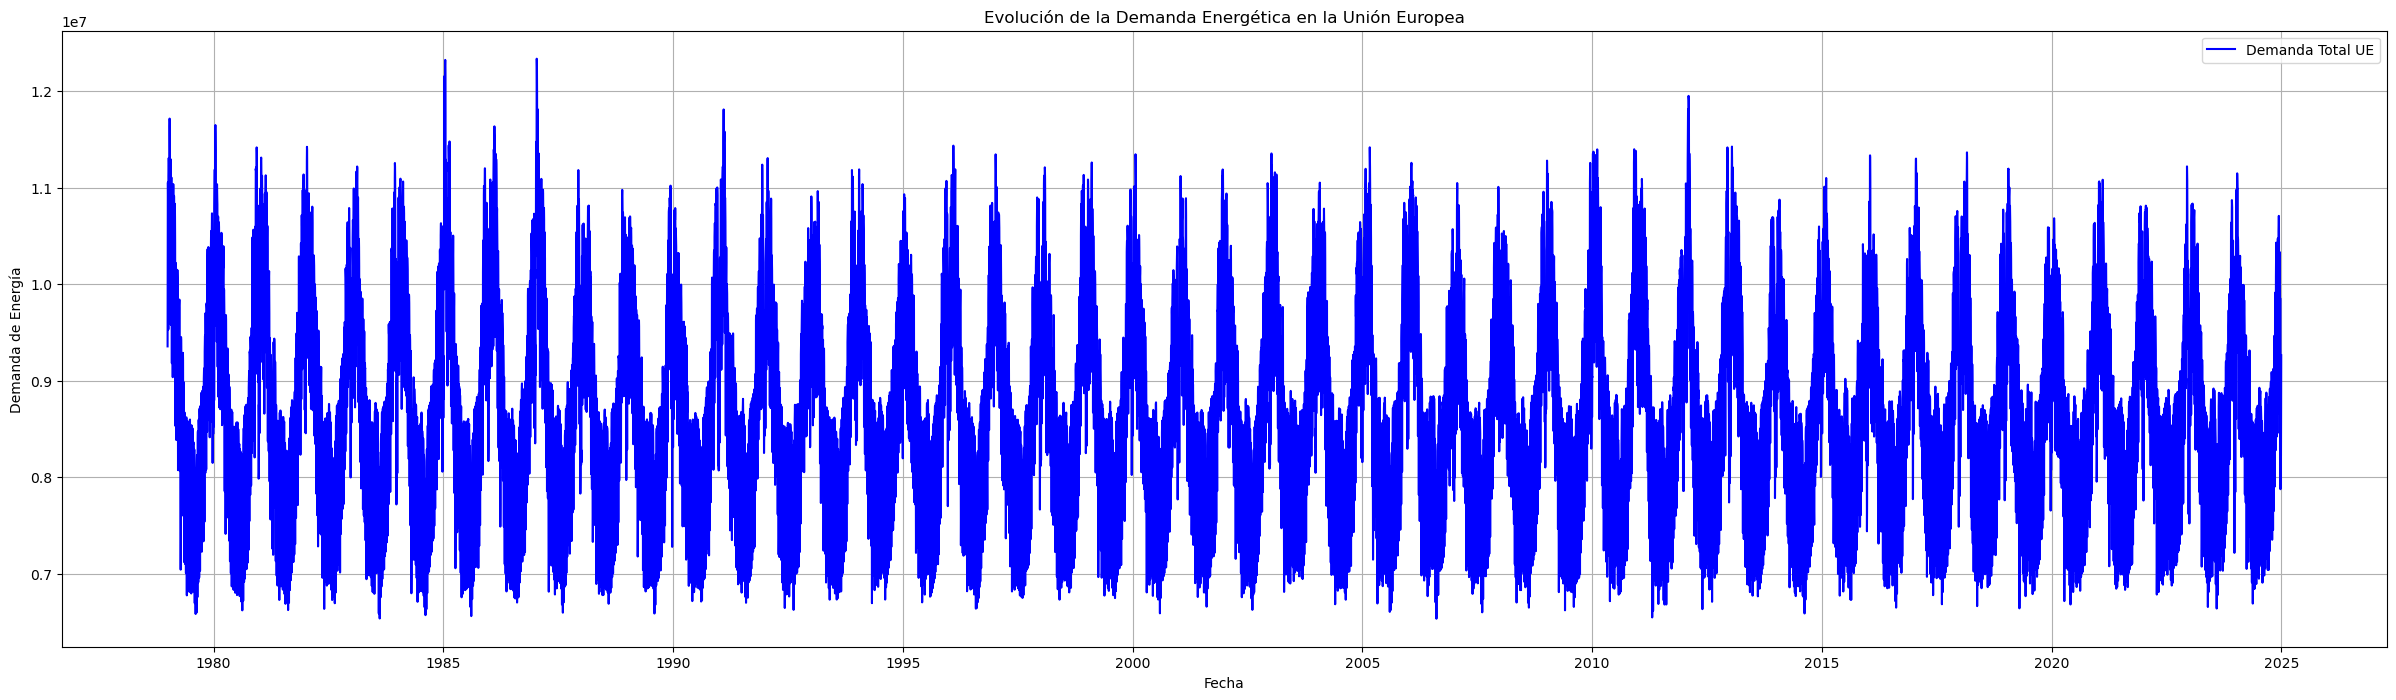

In [24]:

# Crear la figura y el gráfico
plt.figure(figsize=(30, 8))
plt.plot(serie.index, serie.values, label="Demanda Total UE", color="blue")

# Etiquetas y título
plt.xlabel("Fecha")
plt.ylabel("Demanda de Energía")
plt.title("Evolución de la Demanda Energética en la Unión Europea")
plt.legend()
plt.grid()

# Mostrar el gráfico
plt.show()


In [ ]:
# Crear la gráfica
plt.figure(figsize=(12, 6))
plt.plot(serie["Date"], serie["EU_Total_Demand"], label="Demanda Total UE", color="blue", linewidth=2)

# Personalizar la gráfica
plt.xlabel("Fecha")
plt.ylabel("Demanda de Energía (MW)")
plt.title("Demanda Total de Energía en la Unión Europea")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotar fechas para mejor visibilidad

# Mostrar la gráfica
plt.show()

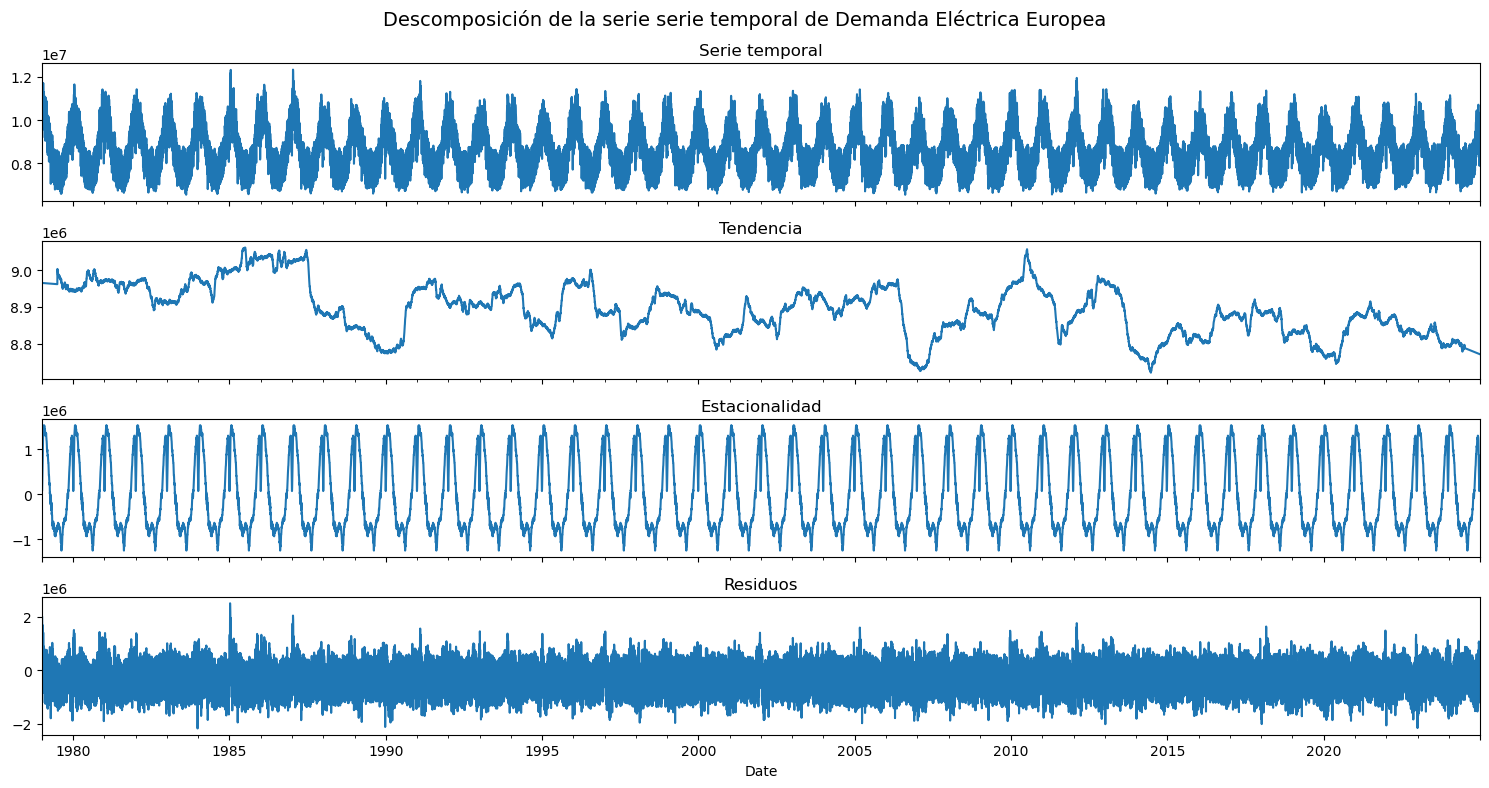

In [ ]:
PERIODO = 365  # anual

descomposicion_serie = seasonal_decompose(serie, model='additive', extrapolate_trend='freq', period=PERIODO)

fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(15, 8), sharex=True)

descomposicion_serie.observed.plot(ax=axs[0,])
axs[0].set_title('Serie temporal', fontsize=12)
descomposicion_serie.trend.plot(ax=axs[1])
axs[1].set_title('Tendencia', fontsize=12)
descomposicion_serie.seasonal.plot(ax=axs[2])
axs[2].set_title('Estacionalidad', fontsize=12)
descomposicion_serie.resid.plot(ax=axs[3])
axs[3].set_title('Residuos', fontsize=12)

fig.suptitle('Descomposición de la serie serie temporal de Demanda Eléctrica Europea', fontsize=14)
fig.tight_layout()